In [1]:
import pandas as pd

data = pd.read_csv('cardio_dataset.csv') # reads and save the dataset in a Pandas Dataframe object
data.head()

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2


In [2]:
print(data.dtypes)


SEX            object
AGEIR         float64
TC            float64
HDL             int64
SMOKE_         object
BPMED          object
DIAB_noyes     object
RISK          float64
dtype: object


In [3]:
data["SEX"] = data["SEX"].astype('category')
data["SMOKE_"] = data["SMOKE_"].astype('category')
data["BPMED"] = data["BPMED"].astype('category')
data["DIAB_noyes"] = data["DIAB_noyes"].astype('category')
print(data.dtypes)


SEX           category
AGEIR          float64
TC             float64
HDL              int64
SMOKE_        category
BPMED         category
DIAB_noyes    category
RISK           float64
dtype: object


In [4]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)
categorical_data.head()

,SEX,SMOKE_,BPMED,DIAB_noyes
0,female,no smoking,taking,no
1,male,no smoking,taking,yes
2,male,smoking,taking,no
3,female,smoking,taking,no
4,female,no smoking,taking,no


In [5]:
dict(zip(categorical_data.SEX.cat.codes, categorical_data.SEX))  # get the categorical code values with corresponding categories

{0: 'female', 1: 'male', -1: nan, 2: 'yes'}

In [6]:
categorical_data["SEX"] = categorical_data["SEX"].cat.codes
categorical_data["SMOKE_"] = categorical_data["SMOKE_"].cat.codes
categorical_data["BPMED"] = categorical_data["BPMED"].cat.codes
categorical_data["DIAB_noyes"] = categorical_data["DIAB_noyes"].cat.codes
categorical_data

,SEX,SMOKE_,BPMED,DIAB_noyes
0,0,0,1,0
1,1,0,1,1
2,1,1,1,0
3,0,1,1,0
4,0,0,1,0
...,...,...,...,...
6639,0,1,0,1
6640,0,0,0,0
6641,1,1,0,0
6642,1,0,0,0


In [10]:
print(categorical_data.SEX[24])

-1


In [2]:
import pandas as pd


data = pd.read_csv('cardio_dataset.csv')
data = data.drop([27])

# data['AGEIR'].fillna((data['AGEIR'].mean()), inplace=True)
# data['TC'].fillna((data['TC'].mean()), inplace=True)
# data['HDL'].fillna((data['HDL'].mean()), inplace=True)

# data['SEX'].fillna((data['SEX'].value_counts().index[0]), inplace=True)

# data.reset_index()

In [6]:
scaled_data = data[['TC','AGEIR']]
scaled_data.head()

,TC,AGEIR
0,236.0,48.0
1,260.0,48.0
2,187.0,44.0
3,216.0,42.0
4,156.0,56.0


In [20]:
from sklearn.preprocessing import StandardScaler

scaled_data = data[['TC','AGEIR']]
standard_scaler = StandardScaler()
transformed = standard_scaler.fit_transform(scaled_data[['TC','AGEIR']])

# print(transformed)
# transformed.shape
print('Mean:', transformed[:,0].mean())
print('Standard Deviation:', transformed.std())
type(transformed)
transformed.shape

Mean: nan
Standard Deviation: nan


(6643, 2)

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

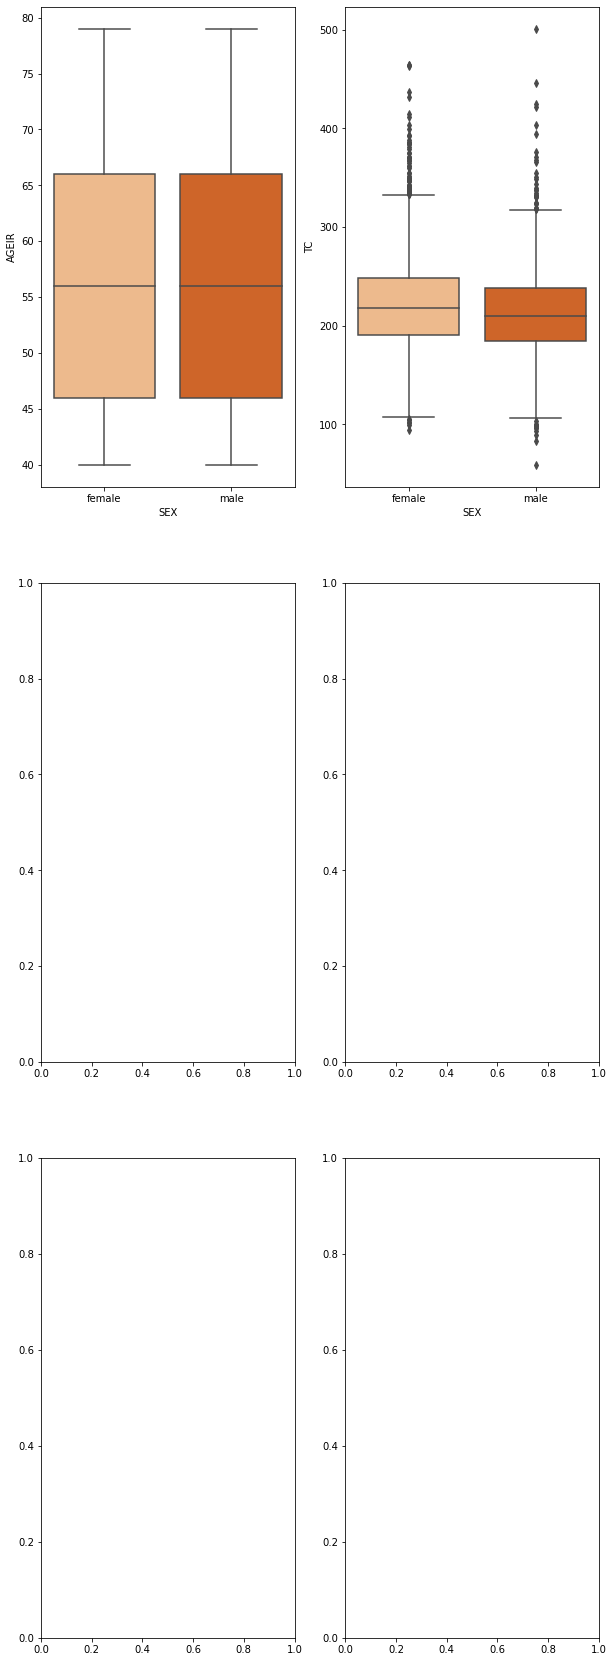

In [39]:
import seaborn as sb
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="AGEIR",x="SEX",orient="v",ax=axes[0][0], palette="Oranges")
sb.boxplot(data=data,y="TC",x="SEX",orient="v",ax=axes[0][1], palette="Oranges")
sb.boxplot(data=data,y="HDL",x="SEX",orient="v",ax=axes[2], palette="Oranges")